<a href="https://colab.research.google.com/github/steflhermitte/EO-Notebooks/blob/master/RemoteSensing%2BBigData/RSBD_Notebook1_Mapping_in_python_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


[<img src="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" width="200" align='right'>](https://www.tudelft.nl/citg/over-faculteit/afdelingen/geoscience-remote-sensing/staff/scientific-staff/dr-stef-lhermitte)


# Mapping in python 
*Created by Stef Lhermitte (s.lhermitte at tudelft.nl / [@steflhermitte](https://twitter.com/StefLhermitte) | www.earthmapps.io)*

*with inspiration and fragments from:*

 *  [ASTG Python Courses](https://colab.research.google.com/github/astg606/py_materials/blob/master/visualization/introduction_cartopy.ipynb)
 * [Ryan Abernathey](https://twitter.com/rabernat)'s [maps with cartopy](https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html)
 * https://automating-gis-processes.github.io/CSC18/lessons/L3/retrieve-osm-data.html 
 * [Folium documentation](https://python-visualization.github.io/folium/quickstart.html)


[![Twitter](https://img.shields.io/twitter/url/https/twitter.com/cloudposse.svg?style=social&label=%20%40steflhermitte)](https://twitter.com/steflhermitte)


## Before you start
Before starting this notebook make sure that you installed the necessary packages (see [Python installation example notebook](https://colab.research.google.com/drive/1MccJkybH3jEDeQ8GkU7NmtbXP8ZE4V5M?usp=sharing)). For your local computer, you only need to install the packages once and you won't need the next cell. For Colab, you need to run the following installation steps every time you start a new notebook and restart the environment afterwards. 

In [2]:
!apt install libspatialindex-dev
!pip install osmnx
!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install git+https://github.com/SciTools/cartopy.git --no-binary cartopy
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely
!pip uninstall -y shapely # cartopy and shapely aren't friends (early 2020) 
!pip install shapely --no-binary shapely
!pip install matplotlib-scalebar
!pip install pyepsg
!pip install owslib
from google.colab import drive
drive.mount('/content/drive')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 1s (437 kB/s)
Selecting previously unselected package libspatialindex

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 0s (66.2 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 148542 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2

For colab users: don't forget to restart your runtime after installation to avoid problems with matplotlib.



## Notebook 1: setting up a mapping plot in python
In this notebook we will learn how to create a map environment in python and add geodata to these plots. Making maps is a fundamental part of geoscience research. Maps differ from regular figures in the following principle ways:
* Maps require a projection of geographic coordinates on the 3D Earth to the 2D space of your figure.
* Maps often include extra decorations besides just our data (e.g. continents, country borders, etc.)
* Mapping is a notoriously hard and complicated problem, mostly due to the complexities of projection.

In the following examples I will walk you through some functionalities to make a map in cartopy. Many of the functionalities could also be tuned otherwise etc. Therefore, if you have doubts I recommend always to run the help function of each function to have a look at the function documentation in order to better understand what ist does and what the inputs are. You can do this by adding a `?` before the function so for example by running: `?ccrs.epgs()` you will get the help for that function.

## What is Cartopy?

* A Python package which provides a set of tools for creating projection-aware geospatial plots using the Python’s standard plotting package, `Matplotlib`.
* Package for drawing maps for for data analysis and visualization,
* Relies on the `PROJ.4`, `Numpy` and `shapely` libraries.
* Has a simple and intuitive drawing interface to Matplotlib.

### What Does Cartopy Provide?

* Facilities to transform coordinates to different <a href="https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#cartopy-projections">map projections</a>
* `Matplotlib` is used to plot contours, images, vectors, lines or points in the transformed coordinates.
* Shorelines, river and political boundary datasets.
* Facilities for reading shapefiles.

Cartopy has two main building blocks:

1. **Projections (`cartopy.crs`):** A utility that provides the ability to define, and transform data among, cartographic projections. The `cartopy.crs` module (CRS = coordinate reference system a.k.a. projection) defines a set of projections which are useful in defining the desired projection of a plot. These projections augment the machinery of `Matplotlib` to allow for geospatial plots.
2. **Features (`cartopy.feature`):** A module for accessing geospatial data files, like shapefiles or GeoJSON. It has a convenient set of data loaders for adding context to maps (like coastlines, borders, place names, etc.). 

### Recall:  <a href="https://realpython.com/python-matplotlib-guide/">The Matplotlib Object Hierarchy</a>

- When we issue the call `plt.plot(x, y)`, we internally creates a hierarchy of nested Python objects: **Figure** and **Axes**.
- A **Figure** object is the outermost container for a matplotlib graphic, which can contain multiple **Axes** objects.
- An **Axes** actually translates into what we think of as an individual plot or graph (rather than the plural of “axis,” as we might expect).
- Below the Axes in the hierarchy are smaller objects such as tick marks, individual lines, legends, and text boxes. Almost every “element” of a chart is its own manipulable Python object, all the way down to the ticks and labels

![FIG_AXES](https://files.realpython.com/media/fig_map.bc8c7cabd823.png)
Image Source: Brad Solomon (Real Python Tutorial)

Below is a figure anatomy of the Matplotlib object hierarchy:

![Anatomy](https://files.realpython.com/media/anatomy.7d033ebbfbc8.png)
Image Source: Brad Solomon (Real Python Tutorial)

## Let's get started and load the necessary packages

We start by importing the necessary packages

In [2]:
import cartopy.crs as ccrs
import cartopy
import folium
import osmnx as ox
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 12] # to make the default figures larger

## The earth is not flat

The surface of a sphere is topologically different to a 2D surface. Therefore, if we want to represent it in a 2D environment (e.g. screen/page), we have to cut the sphere somewhere and this cannot be done without distortion.

There are many different ways to make a projection, and we will not attempt to explain all of the choices and tradeoffs here (check <a href="https://github.com/SciTools/cartopy-tutorial/blob/master/tutorial/projections_crs_and_terms.ipynb" target="_blank">cartopy tutorial</a> if you want to know more). Instead we will use the available cartopy projections which can be initiliased in a variety of ways.


#### Define a projection from it's epsg or proj4 code

You can define a projection from its EPSG code (for examples see https://spatialreference.org/) or proj4 description. EPSG codes are 4-5 digit numbers that represent coordinate reference system (CRS) definitions. The acronym EPGS, comes from the, now defunct, European Petroleum Survey Group. Each code is a unique number which corresponds to a specific pre-defined coordinate system. By providing a number you therefore provide the specific coordinate system specifics. You can check the definition of each EPSG code on  https://spatialreference.org/ or https://epsg.io/.

Here for example we define a projection with EPSG:32631 which corresponds to WGS 84 / UTM zone 31N as you can see here https://epsg.io/32631.

In [ ]:
ccrs.epsg(32631)

_EPSGProjection(32631)

You can subsequently also check for the definition of this projection. For example getting the proj4 definition which is used to define cartographic projections.

In [ ]:
ccrs.epsg(32631).proj4_init

'+datum=WGS84 +ellps=WGS84 +proj=utm +zone=31 +units=m +no_defs +no_defs'

which shows that EPSG:32631 is indeed the UTM 31N on a WGS84 datum

#### Define projection from cartopy native projections

Or directly from Cartopy's <a href="https://scitools.org.uk/cartopy/docs/latest/crs/projections.html" target="_blank">projection list</a>. This list of native available projections tells us that the Plate Carree projection is available with: 

In [ ]:
crs_latlon = ccrs.PlateCarree()

When using these different projections it is important to have/get some basic understanding of how these coordinate reference systems (CRS) work. In general you have two main types of coordinate systems:

*   Geographic coordinate systems : coordinate systems that span the entire globe and where the units are in degrees latitude / longitude (e.g. Geocentric, Geodetic).
*   Projected coordinate Systems: coordinate systems that are localized to minimize visual distortion in a particular region (e.g. Robinson, UTM, State Plane)

You may be wondering, why bother with different CRSs if it makes your analysis more complicated? Well, each CRS is optimized to best represent the:

 * shape and/or
 * scale / distance and/or
 * area

of features in the data. And no one CRS is great at optimizing all three elements: shape, distance AND area. Some CRSs are optimized for shape, some are optimized for distance and some are optimized for area. Some CRSs are also optimized for particular regions - for instance the United States, or Europe. Discussing CRS as it optimizes shape, distance and area is beyond the scope of this tutorial, but it’s important to understand that the CRS that you chose for your data, will impact working with the data.

If you want to learn more about CRS's and how to use them in python I recommend this tutorial from [EarthDataScience](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/spatial-data-vector-shapefiles/intro-to-coordinate-reference-systems-python/)


### Drawing a map

Cartopy optionally depends upon matplotlib for plotting, and each projection knows how to create a matplotlib Axes that turn the plotting environment in a cartopy.mpl.geoaxes.GeoAxes class. This Axes subclass overrides some of matplotlib's existing methods, and adds a number of extremely useful ones for drawing maps.
We'll go back and look at those methods shortly, but first, let's actually see the cartopy+matplotlib dance in action:

<GeoAxesSubplot:>

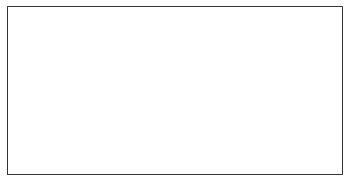

In [ ]:
plt.axes(projection=ccrs.PlateCarree())

That was a little spectacular, but from the output of the previous cell, we can see that the Axes created is indeed one of those `cartopy.mpl.geoaxes.GeoAxesSubplot` instances.

### Adding GeoAxes methods

The cartopy.mpl.geoaxes.GeoAxes class adds a number of useful methods.

Some examples:

* <a href=" https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.set_global" target="_blank">set_global</a>:  zoom the map out as much as possible
* <a href="https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.set_extent" target="_blank">set_extent</a>: zoom the map to the given bounding box
* <a href="https://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html" target="_blank">gridlines</a>: add a graticule (and optionally labels) to the axes
* <a href="https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html?highlight=coastlines#cartopy.mpl.geoaxes.GeoAxes.coastlines" target="_blank">coastlines</a>: add Natural Earth coastlines to the axes
* <a href="https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.stock_img" target="_blank">stock_img</a>: add a low-resolution Natural Earth background image to the axes
* <a href="https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow" target="_blank">imshow</a>: add an image (numpy array) to the axes
* <a href="https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.add_geometries" target="_blank">add_geometries</a>: add a collection of geometries (Shapely) to the axes
* <a href="https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html?highlight=add_wms#cartopy.mpl.geoaxes.GeoAxes.add_wms" target="_blank">add_wms</a>: add a wms layers to the axes

#### Coastlines
One of the most useful methods that the `geoaxes` class adds on top of the standard matplotlib Axes class is the coastlines method. With no arguments, it will add the Natural Earth 1:110,000,000 scale coastline data to the map.

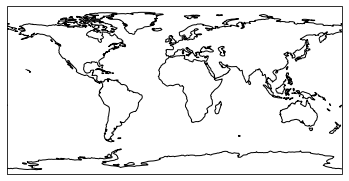

In [ ]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

We could just as equally created a matplotlib subplot with one of the many approaches that exist. For example, the 
`plt.subplots` function could be used:

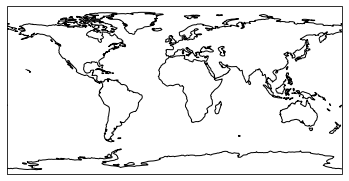

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()

This allows you to set up a figure with different panels. As such we can make for example a figure that shows two map panels.

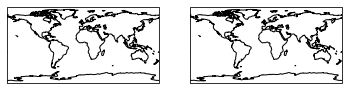

In [ ]:
fig, ax = plt.subplots(ncols=2, subplot_kw={'projection': ccrs.PlateCarree()})
ax[0].coastlines()
ax[1].coastlines()

Or alternatively you could use the `plt.subplot` function to set up different projections for different figure subpanels.

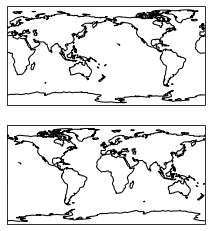

In [ ]:
ax1 = plt.subplot(211, projection=ccrs.PlateCarree(central_longitude=180))
ax1.coastlines()
ax2 = plt.subplot(212, projection=ccrs.PlateCarree())
ax2.coastlines()

#### Stock_img
Another usefull GeoAxesSubplot methods is that we can add a downsampled version of the Natural Earth shaded relief raster to the map.

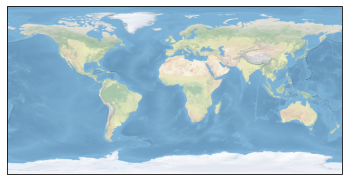

In [ ]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()

#### Gridlines
Yet another usefull GeoAxesSubplot methods is that we can add a gridlines to the map.

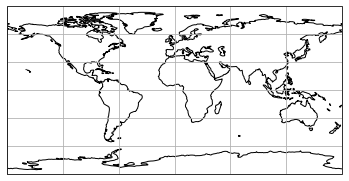

In [ ]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()

And even tune them:

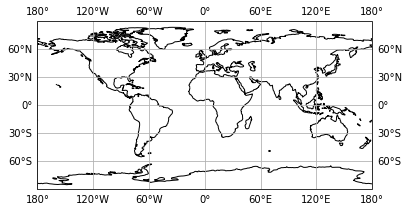

In [ ]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(xlocs=np.arange(-180,190,60),draw_labels=True)

### Customizing projections
Projection classes have options we can use to customize the map:

In [ ]:
ccrs.PlateCarree?

From the class signature, for example, we can see that we can set the 'central_longitude' (which defaults to 0.0). If we change this projection class parameter, we can change our mapping environment.

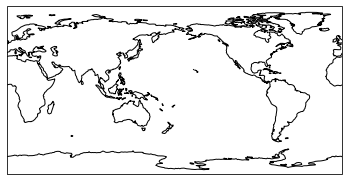

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines()

#### Some More Examples of Different Global Projections
If we now make a default plot for a list of cartopy projections, we can see how the Earth is represented differently for different projections.

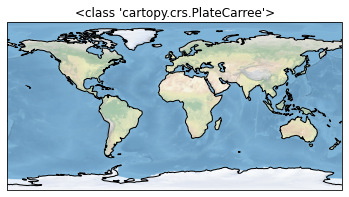

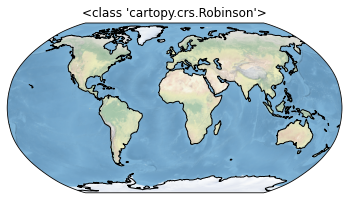

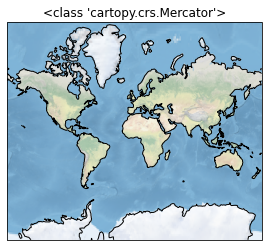

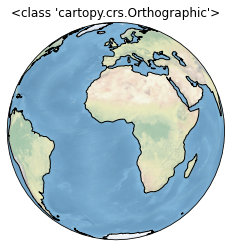

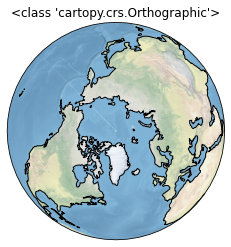

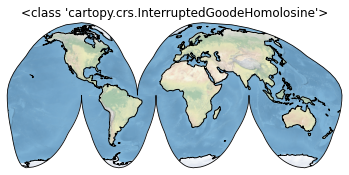

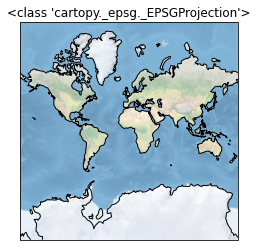

In [ ]:
projections = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.Mercator(),
               ccrs.Orthographic(),
               ccrs.Orthographic(central_longitude=-45, central_latitude=90),
               ccrs.InterruptedGoodeHomolosine(),
               ccrs.epsg(3857)
              ]


for proj in projections:
    plt.figure()
    ax = plt.axes(projection=proj)
    ax.stock_img()
    ax.coastlines()
    ax.set_title(f'{type(proj)}')

### Regional maps

If we now want to move from global to regional maps, we can use the we use the `set_extent` method of GeoAxis to limit the size of the region.

In [ ]:
ax.set_extent?

The help function shows you that do that you will need to set the (`x0, x1, y0, y1)` of the map in the given coordinate system. For example if you want to zoom on Europe you can define a region between -20 (i.e 20 degrees W), 20 (i.e 20 degrees E), 30 (i.e 30 degrees N) and 60 (i.e 60 degrees N).

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


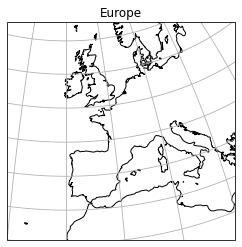

In [ ]:
import numpy as np
central_lon, central_lat = -10, 45
extent = [-20, 20, 30, 60] # with (x0, x1, y0, y1) of the map in the given coordinate system.
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat),title='Europe')
ax.set_extent(extent)
ax.coastlines(resolution='50m')
ax.gridlines()

### Adding a scalebar

By using the `matplotlib-scalebar` package we can also use a scalebar to our map, where the unit of the scalebar is by default set in the unit of the 'projection' (i.e., for Orthographic `1 unit` corresponds to `1 meter`, whereas for PlateCarree which uses lat-lon coordinates `1 unit` corresponds to `1 minute`).

In [ ]:
?ScaleBar

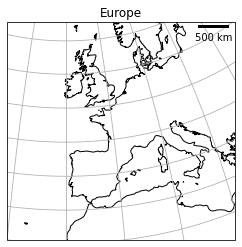

In [ ]:
import numpy as np
central_lon, central_lat = -10, 45
extent = [-20, 20, 30, 60] # with (x0, x1, y0, y1) of the map in the given coordinate system.
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat),title='Europe')
ax.set_extent(extent)
ax.coastlines(resolution='50m')
ax.gridlines()
scalebar = ScaleBar(1,box_alpha=0)
ax.add_artist(scalebar)

If you plot a scalebar it will work based on the units of the map. For example, if your projection is PlateCarree it will be in degrees, whereas in WebMercator (EPSG:3857) it will be in meters. So if you define a scalebar you should specify the unit (especially if it is not in meters)

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


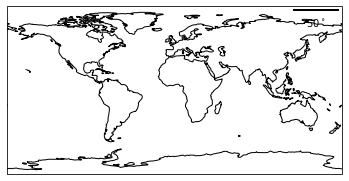

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
scalebar = ScaleBar(1,box_alpha=0,units='deg',dimension='angle')
ax.add_artist(scalebar)

If you want your units in meters, you have to convert them manually. For example you can do this by approximating one degree by 40000km (the circumference of the earth) divided by 360 (the number of degrees to cover the circumference)

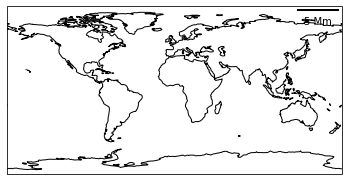

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
scalebar = ScaleBar(40000/360,box_alpha=0,units='km')
ax.add_artist(scalebar)

In this you now see that the scalebar is in 'm', actually showing `5 Mm` = 5 million meters. As this is a rather uncommon unit, we can also manually set the output to unit/value we prefer (e.g. 5000 km)

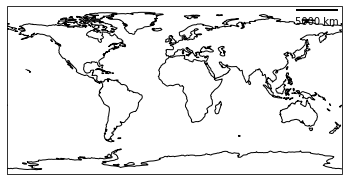

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
scalebar = ScaleBar(40000/360,box_alpha=0,units='km',fixed_units='km',fixed_value=5000)
ax.add_artist(scalebar)

### Adding Cartopy features
To give our map more styles and details, we add `cartopy.feature` objects. Many useful features are built in. These "default features" are at coarse (110m) resolution:

* `cartopy.feature.BORDERS`:	Country boundaries
* `cartopy.feature.COASTLINE`:	Coastline, including major islands
* `cartopy.feature.LAKES`:	Natural and artificial lakes
* `cartopy.feature.LAND`:	Land polygons, including major islands
* `cartopy.feature.OCEAN`:	Ocean polygons
* `cartopy.feature.RIVERS`:	Single-line drainages, including lake centerlines
* `cartopy.feature.STATES`:	(limited to the United States at this scale)

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarn

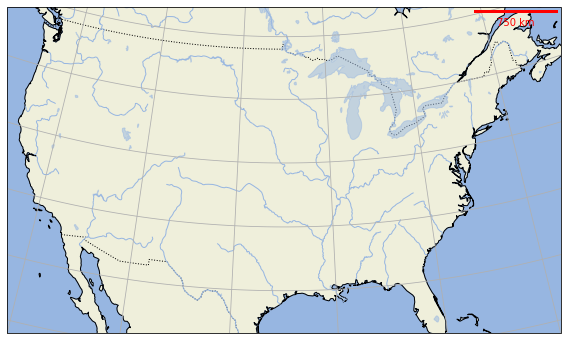

In [ ]:
import cartopy.feature as cfeature
import numpy as np

central_lat = 37.5
central_lon = -96
extent = [-120, -70, 24, 50.5]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])

plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

# Add land
ax.add_feature(cartopy.feature.LAND)

# Add ocean
ax.add_feature(cartopy.feature.OCEAN)

# Add cost lines
ax.add_feature(cartopy.feature.COASTLINE)

# Add country boundaries
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

# Add lakes
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)

# Add rivers
ax.add_feature(cartopy.feature.RIVERS)

# Add gridlines
ax.gridlines()

# Add scalebar
ax.add_artist(ScaleBar(1,box_alpha=0,color='red'))

By selecting the category and scale level of the added features, we can further tune the added features. On the [NaturalEarth website](https://www.naturalearthdata.com/features/) you can check which features are available at which scale level (one of '10m', '50m', or '110m' corresponding to 1:10000,000, 1:50000000, and 1:110000000). 

For example we can download the rivers and glaciers from the physical category at 10m scale

In [ ]:
rivers_10m = cfeature.NaturalEarthFeature('physical', 'rivers_lake_centerlines', '10m')
glaciers_10m = cfeature.NaturalEarthFeature('physical', 'glaciated_areas', '10m')

Or the city boundaries from the cultural category:

In [ ]:
urb_50m = cfeature.NaturalEarthFeature('cultural', 'urban_areas', '50m')

And add it to our map:

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_rivers_lake_centerlines.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/physical/ne_10m_glaciated_areas.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/cultural/ne_50m_urban_areas.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


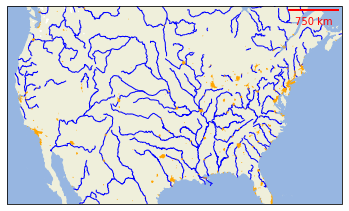

In [ ]:
# plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.AlbersEqualArea(central_lon, central_lat))
ax.set_extent(extent)

# Add land
ax.add_feature(cartopy.feature.LAND)

# Add ocean
ax.add_feature(cartopy.feature.OCEAN)

# Add rivers
ax.add_feature(rivers_10m, facecolor='None', edgecolor='b')

# Add glaciers
ax.add_feature(glaciers_10m, facecolor='None', edgecolor='white')

# Add urban areas
ax.add_feature(urb_50m, facecolor='orange', edgecolor='None')

# Add scalebar
ax.add_artist(ScaleBar(1,box_alpha=0,color='red'))


Or we can add the day/night shading for indicating which parts of the earth are in daylight for a specific time.

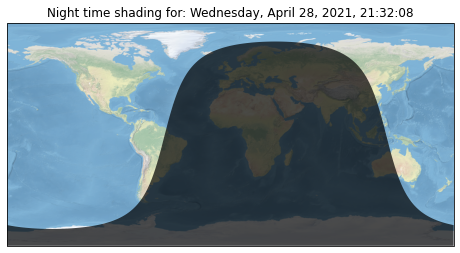

In [ ]:
from cartopy.feature.nightshade import Nightshade
import datetime
fig = plt.figure(figsize=(8, 5))

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.stock_img()

cur_date = datetime.datetime.now()
ax.add_feature(Nightshade(cur_date, alpha=0.7))

ax.set_title('Night time shading for: {}'.format(cur_date.strftime("%A, %B %d, %Y, %H:%M:%S")))

plt.show()

# Adding Data to the Map

Now that we know how to create a map and how to add cartopy featurtes, let's add our own data to it! 

Because our map is a matplotlib axis, we can use all the familiar maptplotlib commands to make plots. By default, the map extent will be adjusted to match the data. We can override this with the `.set_global` or `.set_extent` commands.

The core concept when adding data is that the projection of your axes is independent of the coordinate system your data is defined in. The projection argument is used when creating plots and determines the projection of the resulting plot (i.e. what the plot looks like). The transform argument to plotting functions tells Cartopy what coordinate system your data are defined in.

When doing this the data also have to be transformed to the projection space. This is done via the `transform=` keyword in the plotting method. The argument is another `cartopy.crs` object. If you don't specify a transform, Cartopy assume that the data is using the same projection as the underlying GeoAxis.

To summarize:
+ The projection of your axes is independent of the coordinate system your data is defined in.
+ The `projection` argument is used when creating plots and determines the projection of the resulting plot.
+ The `transform` argument to plotting functions tells Cartopy what coordinate system your data are defined in.

For more info you can always check the <a href="https://scitools.org.uk/cartopy/docs/latest/tutorials/understanding_transform.html" target="_blank">cartopy information</a>.

In the following example, you can see how different transforms result in different lines, where the first one is a line in the projection of the map (i.e. PlateCaree) resulting in a straight line and the second is a line in the Geodetic projection (i.e. on a sphere), resulting in a curved line that represents the shortest distance on a real globe

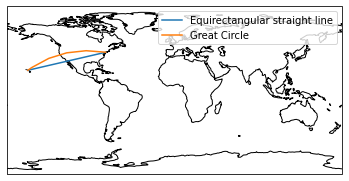

In [ ]:
# create some test data
new_york = dict(lon=-74.0060, lat=40.7128)
honolulu = dict(lon=-157.8583, lat=21.3069)
lons = [new_york['lon'], honolulu['lon']]
lats = [new_york['lat'], honolulu['lat']]
# Plot in
ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(lons, lats, label='Equirectangular straight line') # straight line in the projection of the map (i.e. PlateCaree)
ax.plot(lons, lats, label='Great Circle', transform=ccrs.Geodetic()) # line in the Geodetic projection (i.e. on a sphere), resulting in a curved line that represents the shortest distance on a real globe
ax.coastlines()
ax.legend()
ax.set_global()

## Adding text and points
By using the standard `plot` and `text` plotting commands we can also annotate the map by adding points and lines (`plot`) and text (`text`) just as you would do in a normal matplotlib plot but now using the geograpic coordinates as x/y coordinates.

Text(-117, 33, 'San Diego')

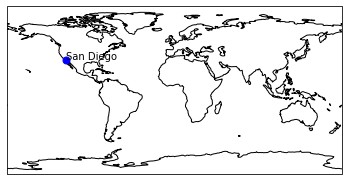

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

The code below creates a Pandas dataframe that contains the latitude and longitude data of a city in each country of the world. We could use the same method to add a dot/name for each city.

In [ ]:
url = "https://developers.google.com/public-data/docs/canonical/countries_csv"

df = pd.read_html(url)
df = df[0]
df

/usr/local/lib/python3.7/dist-packages/html5lib/_trie/_base.py:3: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


country   latitude  longitude                  name
0        AD  42.546245   1.601554               Andorra
1        AE  23.424076  53.847818  United Arab Emirates
2        AF  33.939110  67.709953           Afghanistan
3        AG  17.060816 -61.796428   Antigua and Barbuda
4        AI  18.220554 -63.068615              Anguilla
..      ...        ...        ...                   ...
240      YE  15.552727  48.516388                 Yemen
241      YT -12.827500  45.166244               Mayotte
242      ZA -30.559482  22.937506          South Africa
243      ZM -13.133897  27.849332                Zambia
244      ZW -19.015438  29.154857              Zimbabwe

[245 rows x 4 columns]

## Adding lines
We can alos add lines using the standard data line plots

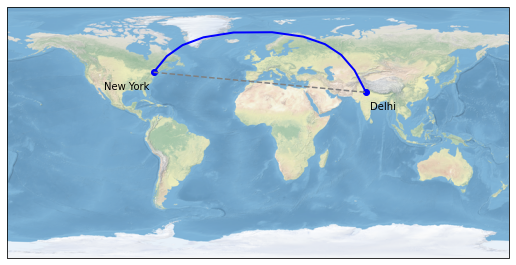

In [ ]:
plt.figure(figsize=(9, 5))

map_projection = ccrs.PlateCarree()

ax = plt.axes(projection=map_projection)
ax.stock_img()

ny_lon, ny_lat = -75, 43
delhi_lon, delhi_lat = 77.23, 28.61

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='blue', linewidth=2, marker='o',
         transform=ccrs.Geodetic())

plt.plot([ny_lon, delhi_lon], [ny_lat, delhi_lat],
         color='gray', linestyle='--',
         transform=ccrs.PlateCarree())

plt.text(ny_lon - 3, ny_lat - 12, 'New York',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

plt.text(delhi_lon + 3, delhi_lat - 12, 'Delhi',
         horizontalalignment='left',
         transform=ccrs.Geodetic())

plt.show()

## Adding 2D raster data

The same principles apply to 2D data. Below we create some example data defined in regular lat / lon coordinates.

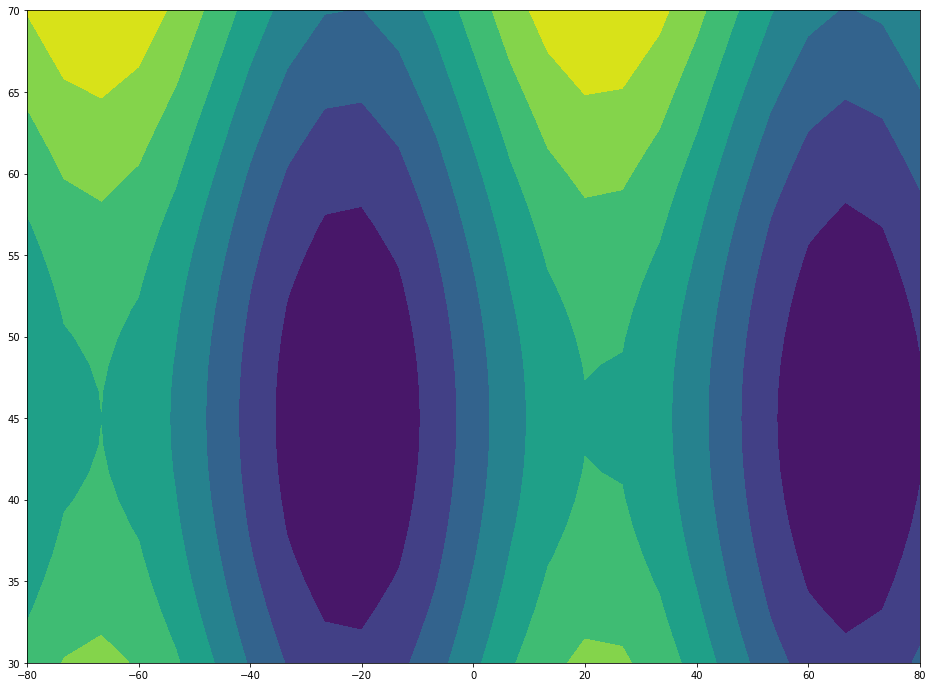

In [19]:
lon = np.linspace(-80, 80, 25)
lat = np.linspace(30, 70, 25)
lon2d, lat2d = np.meshgrid(lon, lat)
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)
plt.contourf(lon2d, lat2d, data)

Now we create a `PlateCarree` projection and plot the data on it without any transform keyword. This happens to work because `PlateCarree` is the simplest projection of lat / lon data.

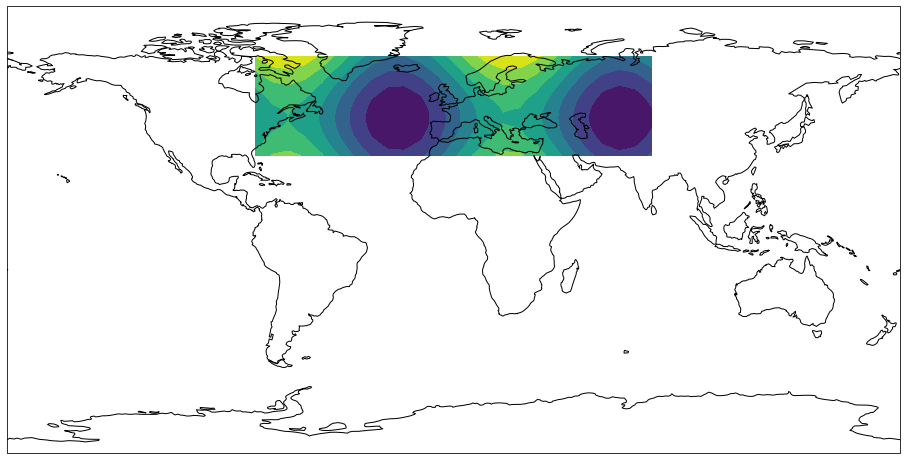

In [ ]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

However, if we try the same thing with a different projection, the data are not properly located and the plot either does not plot the data and/or plots it at the wrong location.

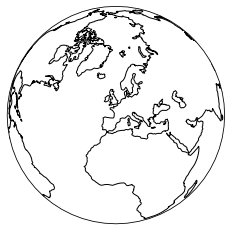

In [ ]:
# projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
projection = ccrs.Orthographic(central_latitude=45)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data)

To fix this, we need to pass the correct transform argument to contourf:

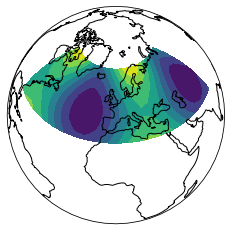

In [ ]:
projection = ccrs.Orthographic(central_latitude=45)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())

## Adding a colorbar
When adding data it is always good practice to add a legend and/or colorbar. Since you work in a normal plot environment you can use the classic colorbar

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Calling add_axes() without argument is deprecated since 3.3 and will be removed two minor releases later. You may want to use add_subplot() instead.
  


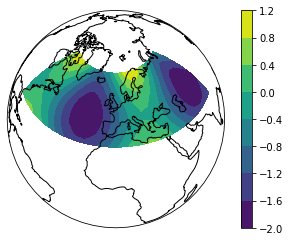

In [ ]:
projection = ccrs.Orthographic(central_latitude=45)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
im = ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())
cax = fig.add_axes()
plt.colorbar(im, cax=cax)

## Adding a legend
Or we can alternatively add a legend as we already did before using the standard legend function:

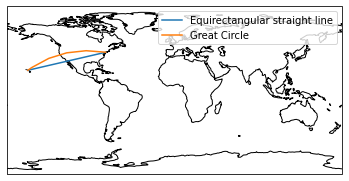

In [ ]:
# Plot in
ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(lons, lats, label='Equirectangular straight line') # straight line in the projection of the map (i.e. PlateCaree)
ax.plot(lons, lats, label='Great Circle', transform=ccrs.Geodetic()) # line in the Geodetic projection (i.e. on a sphere), resulting in a curved line that represents the shortest distance on a real globe
ax.coastlines()
ax.set_global()

# Add a legend
ax.legend()


Or tune the legend if we want to use manually defined color patches instead of lines.

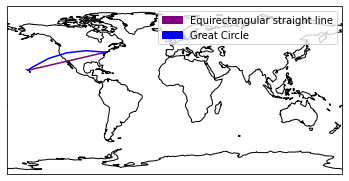

In [ ]:
import matplotlib.patches as mpatches
ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(lons, lats, color='purple', label='') # straight line in the projection of the map (i.e. PlateCaree)
ax.plot(lons, lats, color='blue', label='Great Circle', transform=ccrs.Geodetic()) # line in the Geodetic projection (i.e. on a sphere), resulting in a curved line that represents the shortest distance on a real globe
ax.coastlines()
ax.set_global()

# Adding a manually defined legend
patch1 = mpatches.Patch(color='purple', label='Equirectangular straight line')
patch2 = mpatches.Patch(color='blue', label='Great Circle')
plt.legend(handles=[patch1,patch2],loc='upper right')

## Adding images

Similarly, we can easily add (satellite) image easily on a map if we know its extent. For example, we can add the satellite image (e.g. Miriam.A2012270.2050.2km.jpg from a website). 

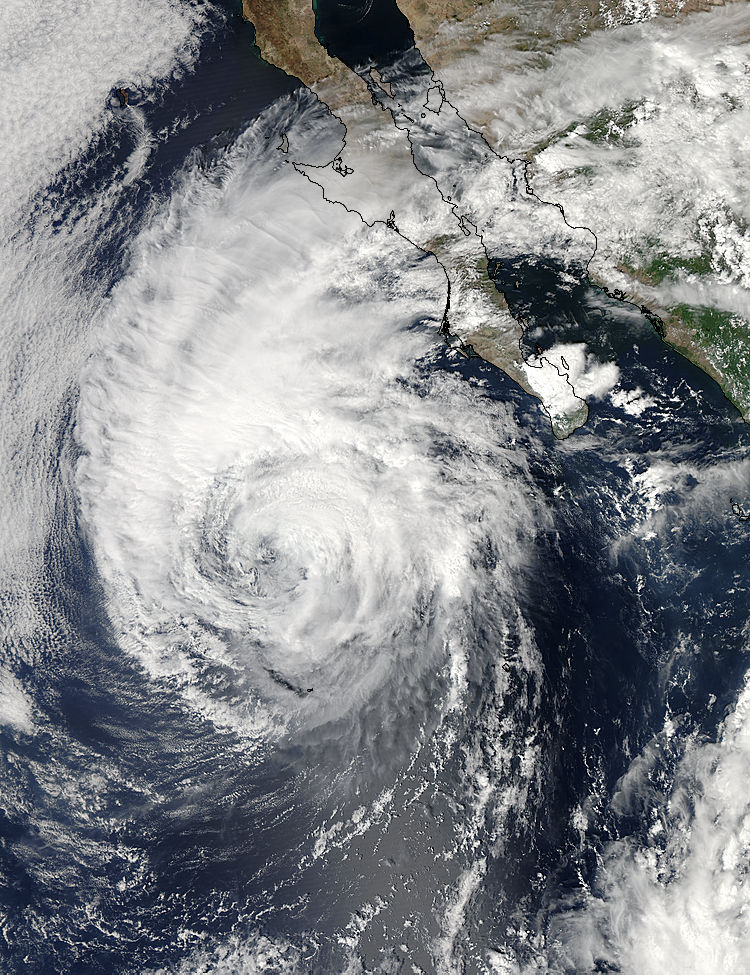

In [ ]:
# Get the remote file
from urllib.request import urlopen
from PIL import Image
url = "https://lance-modis.eosdis.nasa.gov/imagery/gallery/2012270-0926/Miriam.A2012270.2050.2km.jpg"

img = Image.open(urlopen(url))
img

Or we can read it in locally from your computer or colab folder if you download the image from the url to your local computer or drive (for colab)

In [ ]:
fname = "/content/Miriam.A2012270.2050.2km.jpg"
img = plt.imread(fname)
img

array([[[213, 212, 210],
        [206, 205, 203],
        [203, 202, 200],
        ...,
        [ 92,  80,  58],
        [ 83,  71,  45],
        [ 81,  70,  40]],

       [[210, 209, 207],
        [209, 208, 206],
        [207, 206, 204],
        ...,
        [110, 102,  83],
        [104,  96,  75],
        [ 98,  90,  67]],

       [[217, 216, 214],
        [215, 214, 212],
        [212, 211, 209],
        ...,
        [134, 128, 114],
        [141, 135, 121],
        [153, 147, 133]],

       ...,

       [[ 26,  36,  48],
        [ 67,  76,  91],
        [ 61,  70,  87],
        ...,
        [217, 216, 212],
        [218, 217, 213],
        [218, 217, 213]],

       [[ 87,  97, 109],
        [ 74,  83,  98],
        [ 85,  94, 111],
        ...,
        [213, 212, 208],
        [214, 213, 209],
        [216, 215, 211]],

       [[ 85,  95, 107],
        [ 66,  75,  90],
        [ 91, 100, 117],
        ...,
        [212, 211, 207],
        [214, 213, 209],
        [218, 217, 213]]

Subsequently we can add the image to our map. Therefore, we have to take into account how the origin of the image is defined. For geographic data sets the origin is often the upper left corner whereas for most coordinate systems/plots the origin is in the lower left corner.

Text(-117, 33, 'San Diego')

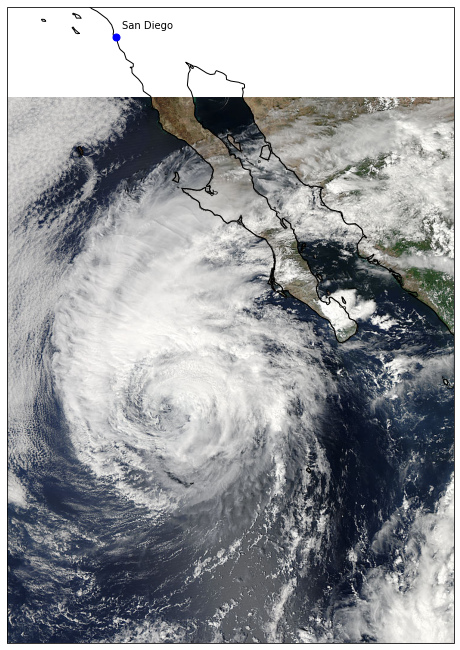

In [ ]:
# Since the loaded image is not geographically located we have to manually set the image extent
img_extent = (-120.67660000000001, -106.32104523100001, 13.2301484511245, 30.766899999999502)

# Initialize a figure
fig = plt.figure(figsize=(8, 12))
ax = plt.axes(projection=ccrs.PlateCarree())

# add the image. Because this image was a tif, the "origin" of the image is in the
# upper left corner
ax.imshow(img, origin='upper', extent=img_extent, transform=ccrs.PlateCarree())

# Add the coastlines to see if the image is properly located
ax.coastlines(resolution='50m', color='black', linewidth=1)

# mark a known place to help us geo-locate ourselves
ax.plot(-117.1625, 32.715, 'bo', markersize=7, transform=ccrs.Geodetic())
ax.text(-117, 33, 'San Diego', transform=ccrs.Geodetic())

## Adding WMS layers
We can also add WMS layers. WMS provides a simple HTTP interface (internet) for requesting geo-registered map images from one or more distributed geospatial databases. A WMS request defines the geographic layer(s) and area of interest to be processed. The response to the request is one or more geo-registered map images (returned as JPEG, PNG, etc) that can be displayed. 

To add WMS data you need:
*  an **area of interest**, which is defined by your plot extent
*  a link to a geospatial **WMS server**. This could be for example the WMS server of [NASA worldview](https://worldview.earthdata.nasa.gov/) for global satellite records or to the WMS server of [PDOK](https://www.pdok.nl/geo-services/-/article/luchtfoto-pdok) for airborne imagery over the Netherlands or any other WMS service you find online
* a **layer name** to be visualized. You can find the name of these layers at the respective WMS providers typically with the `GetCapabilities` request (e.g. https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi?SERVICE=WMS&REQUEST=GetCapabilities&VERSION=1.3.0  for NASA or https://service.pdok.nl/hwh/luchtfotorgb/wms/v1_0?&request=GetCapabilities&service=wms for PDOK) and then search for the `name` tag in the XML file.
* other optional arguments such as a `time` argument for the MODIS data to query for a specific date




In this case we are going to request a WMS layer from the [NASA worldview database](https://worldview.earthdata.nasa.gov/) using:


*   `https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi` as the WMS server
*   `VIIRS_SNPP_CorrectedReflectance_TrueColor` as the layer which implies we are going to visualize the Visible Infrared Imaging Radiometer Suite (VIIRS) Corrected Reflectance which are called true-color or natural color because this combination of wavelengths is similar to what the human eye would see. 
* `2021-01-01` as the time to visualize the first of Jan 2021:

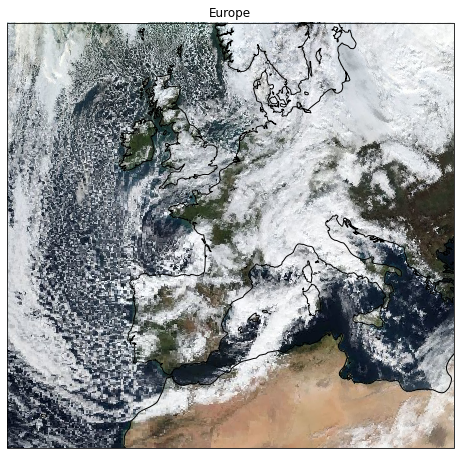

In [ ]:
fig = plt.figure(figsize=(8, 12))
central_lon, central_lat = -10, 45
extent = [-20, 20, 30, 60] # with (x0, x1, y0, y1) of the map in the given coordinate system.
ax = plt.axes(projection=ccrs.Orthographic(central_lon, central_lat),title='Europe')
ax.set_extent(extent)
ax.coastlines(resolution='50m')
ax.add_wms(wms='https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi',layers=['VIIRS_SNPP_CorrectedReflectance_TrueColor'],wms_kwargs={'time':'2021-01-01'})


Similarly we can visualize the PDOK orthophotos over the Netherlands using:
* A subset of Delft as the area
*   `https://service.pdok.nl/hwh/luchtfotorgb/wms/v1_0` as the WMS server
*   `Actueel_ortho25` as the recent 25cm orthophotos or `2016_ortho25` as the 2016 25cm orthophotos


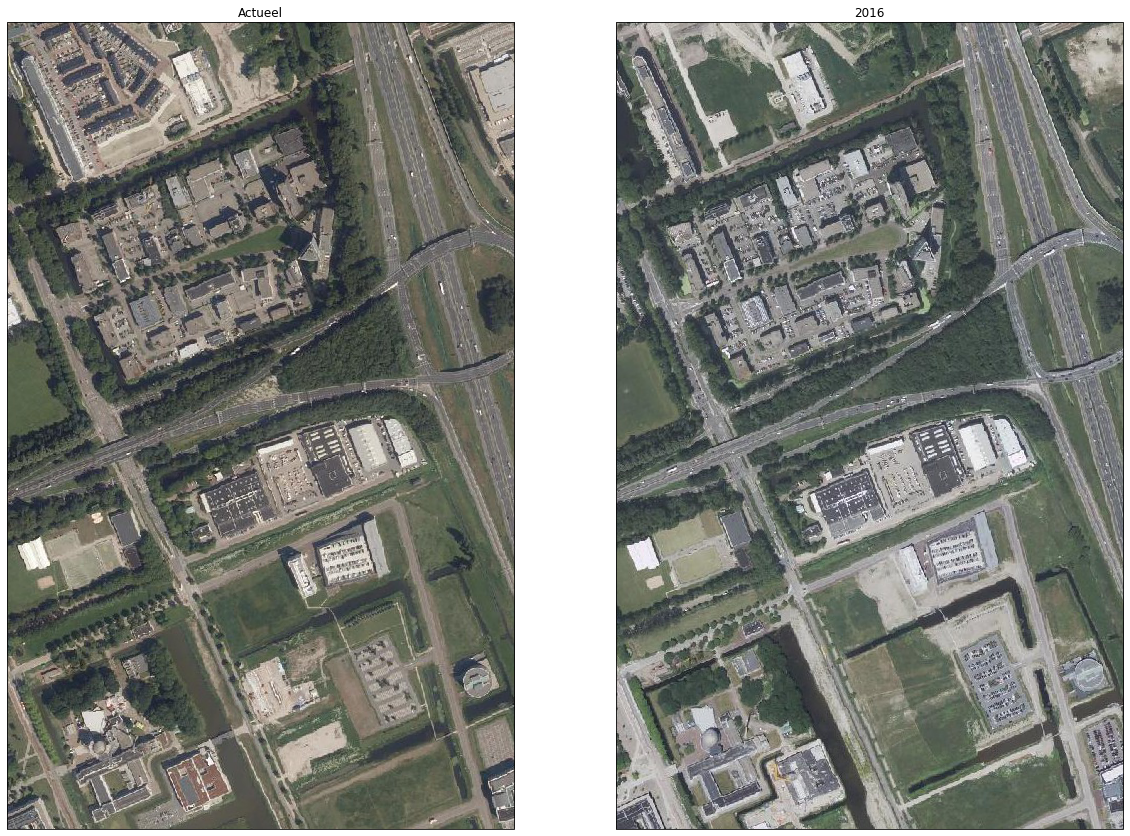

In [ ]:
plt.figure(figsize=(20,20))
crs = ccrs.epsg(32631)

# Actueel
ax1 = plt.subplot(121, projection=crs, title='Actueel')
ax1.set_extent([4.38,4.39,51.99,52],crs=ccrs.PlateCarree())
ax1.add_wms(wms='https://service.pdok.nl/hwh/luchtfotorgb/wms/v1_0',layers=['Actueel_ortho25'])

# 2016
ax2 = plt.subplot(122, projection=crs, title='2016')
ax2.set_extent([4.38,4.39,51.99,52],crs=ccrs.PlateCarree())
ax2.add_wms(wms='https://service.pdok.nl/hwh/luchtfotorgb/wms/v1_0',layers=['2016_ortho25'])

# Setting up an interactive map

Now that we learned how to setup a map and add data to it, we are going to try to create an interactive map. Therefore we will use the `folium` package, which is a Python package for interactive maps. Interactive maps are useful for data exploration and communicating research. Leaflet, an open-source JavaScript library, facilitates the development of interactive maps, but is designed to be used via JavaScript. This tutorial provides a short demonstration of the folium package, which provides an easy to use interface to Leaflet for Python users.

To create a base map, simply pass your starting coordinates to Folium:

In [3]:
import folium
m = folium.Map(location=[45.5236, -122.6750])

To display it in a Jupyter notebook, simply ask for the object representation:

In [4]:
m

to save it in a file,

In [ ]:
m.save("index.html")

The default tiles are set to OpenStreetMap, but Stamen Terrain, Stamen Toner, Mapbox Bright, and Mapbox Control Room, and many others tiles are built in and you can also play with the zoom level etc.

In [6]:
?folium.Map

In [12]:
folium.Map(location=[45.5236, -122.6750], zoom_start=13, tiles='Stamen Toner')

You can also use multiple background maps and add a layer control option, so the user can play with it:

In [30]:
m = folium.Map(location=(0, 0), zoom_start=4, tiles='cartodbpositron')
# Add a second layer
folium.TileLayer('OpenStreetMap').add_to(m)
# Add a third costum layer
url = 'https://mt1.google.com/vt/lyrs=m&x={x}&y={y}&z={z}'
folium.TileLayer(tiles=url, name='Google Map', attr='Google').add_to(m)
# Add layer control
folium.LayerControl(position='topright').add_to(m)
# Show map
m

## Adding markers to the map
Now that we’re able to display a map centeret at a point of our choosing, we can try adding some more content to the map via markers. Markers can be extremely useful for storing information about locations on the map such as cross streets, building information, etc. Using the same map, let’s add markers indicating where CU Boulder is as well as East Campus and the SEEC building.

For adding data you always use `.add_to()`:


In [16]:
#Define coordinates of where we want to center our map
boulder_coords = [40.015, -105.2705]
#Create the map
my_map = folium.Map(location = boulder_coords, zoom_start = 13)

#Define the coordinates we want our markers to be at
CU_Boulder_coords = [40.007153, -105.266930]
East_Campus_coords = [40.013501, -105.251889]
SEEC_coords = [40.009837, -105.241905]

#Add markers to the map
folium.Marker(CU_Boulder_coords, popup = 'CU Boulder').add_to(my_map)
folium.Marker(East_Campus_coords, popup = 'East Campus').add_to(my_map)
folium.Marker(SEEC_coords, popup = 'SEEC Building').add_to(my_map)

#Display the map
my_map

## Adding Features
Existing features (such as GeoJSON and TopoJSON layers) can be passed also to the map as an overlay, and multiple layers can be visualized on the same map:

In [ ]:
# Define the (online) file names to read
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
antarctic_ice_edge = f"{url}/antarctic_ice_edge.json"
antarctic_ice_shelf_topo = f"{url}/antarctic_ice_shelf_topo.json"

# Create a map
m = folium.Map(
    location=[-59.1759, -11.6016],
    tiles="cartodbpositron",
    zoom_start=2,
)

# Add the layers
folium.GeoJson(antarctic_ice_edge, name="geojson").add_to(m)

folium.TopoJson(
    json.loads(requests.get(antarctic_ice_shelf_topo).text),
    "objects.antarctic_ice_shelf",
    name="topojson",
).add_to(m)
# Add layer control
folium.LayerControl().add_to(m)
# Show the map
m

These features can subsequently be tuned and styled (e.g. cholorpleths), but for more info check the folium [quickstart](https://python-visualization.github.io/folium/quickstart.html#Choropleth-maps).

## Adding 2D raster data
Similar as in cartopy, we can also add 2D raster data:

In [22]:
# Create data
lon_bounds = (-180, 180)
lat_bounds = (-90, 90)

lon2d, lat2d = np.meshgrid(np.linspace(*lon_bounds, 256), \
                           np.linspace(*lat_bounds, 256))

data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)

In [24]:
# Create colormap
from matplotlib import cm
cmap = cm.ScalarMappable(cmap=cm.coolwarm)
cmap.set_clim(vmin=data.min(), vmax=data.max()) 

# Create folium map
m = folium.Map(location=(0, 0), zoom_start=4, tiles='cartodbpositron')

# Add data with colormap (Default hidden in layer control)
folium.raster_layers.ImageOverlay(data, \
                                  ((lat_bounds[0], lon_bounds[0]), \
                                   (lat_bounds[1], lon_bounds[1])), \
                                  colormap=cmap.to_rgba, opacity=.5, \
                                  name='Data').add_to(m)

# Add layer control
folium.LayerControl(position='topright').add_to(m)
m

## Adding WMS data
Or we can add WMS data:

In [27]:
# Create folium map
m = folium.Map(location=(0, 0), zoom_start=4, tiles='cartodbpositron')

# # Add WMS
folium.raster_layers.WmsTileLayer(url='https://gibs.earthdata.nasa.gov/wms/epsg4326/best/wms.cgi', \
                                  layers=['MODIS_Terra_CorrectedReflectance_TrueColor'], \
                                  time='2021-08-30', opacity=.5, \
                                  name='WMS').add_to(m)

# Add layer control
folium.LayerControl(position='topright').add_to(m)
m

# Done
